# Random Forest Classifier

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

data = pd.read_csv("Data/digit-recognizer/train.csv")

y = data["label"]
y = y.values
X = data.drop(columns={"label"})
X = X.values

In [94]:
# Split data into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state = 42)

rf_classifier.fit(X_train, y_train)

prediction = rf_classifier.predict(X_test)

accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.96


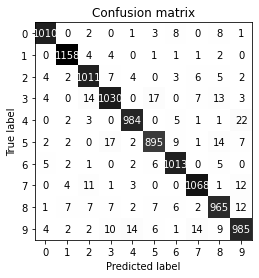

In [96]:
from sklearn.metrics import confusion_matrix, roc_auc_score
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, prediction), xlabel='Predicted label',
    ylabel='True label', xticklabels=[0,1,2,3,4,5,6,7,8,9],
    yticklabels=[0,1,2,3,4,5,6,7,8,9], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [97]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [10, 50, 100, 250], "max_features": [7, 14, 28, 56]}
grid = GridSearchCV(rf_classifier, param_grid = param_grid, cv=3)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'max_features': 14, 'n_estimators': 250}
Best cross-validation score (accuracy)): 0.960
Test set accuracy: 0.963


In [100]:
pd.DataFrame(grid.cv_results_).drop(columns={"params"})

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.410877,0.032615,0.059633,0.010261,7,10,0.908571,0.908476,0.910095,0.909048,0.000742,16
1,1.636827,0.012142,0.168795,0.004693,7,50,0.948095,0.948095,0.951524,0.949238,0.001616,12
2,3.230480,0.068895,0.333846,0.010219,7,100,0.953143,0.953619,0.956476,0.954413,0.001472,11
3,8.388879,0.582431,0.815595,0.059753,7,250,0.956476,0.956381,0.959238,0.957365,0.001325,7
4,0.574980,0.028703,0.052536,0.009386,14,10,0.923143,0.919714,0.923429,0.922095,0.001688,15
5,2.730935,0.200251,0.172455,0.004427,14,50,0.954095,0.954286,0.955810,0.954730,0.000767,10
6,5.100590,0.200813,0.299777,0.013178,14,100,0.956952,0.957048,0.959714,0.957905,0.001280,6
7,12.423859,0.056028,0.752951,0.021310,14,250,0.958381,0.959048,0.962190,0.959873,0.001661,1
8,0.914058,0.016962,0.045715,0.002419,28,10,0.928476,0.927905,0.929905,0.928762,0.000841,14
9,4.441508,0.025515,0.155745,0.011739,28,50,0.952667,0.955524,0.957714,0.955302,0.002067,9


In [101]:
print(grid.predict_proba(X_test)[:10])

[[0.008 0.    0.024 0.084 0.012 0.02  0.008 0.02  0.796 0.028]
 [0.016 0.024 0.012 0.064 0.008 0.372 0.292 0.008 0.176 0.028]
 [0.    0.02  0.928 0.012 0.004 0.    0.024 0.004 0.008 0.   ]
 [0.008 0.004 0.012 0.028 0.772 0.008 0.016 0.032 0.04  0.08 ]
 [0.004 0.02  0.004 0.024 0.    0.836 0.016 0.    0.072 0.024]
 [0.604 0.    0.024 0.052 0.008 0.12  0.104 0.06  0.012 0.016]
 [0.012 0.004 0.032 0.004 0.012 0.    0.928 0.004 0.    0.004]
 [0.024 0.004 0.128 0.016 0.128 0.008 0.632 0.016 0.02  0.024]
 [0.004 0.    0.016 0.008 0.024 0.016 0.    0.672 0.    0.26 ]
 [0.008 0.004 0.    0.012 0.012 0.004 0.    0.02  0.012 0.928]]


In [102]:
np.count_nonzero(rf_classifier.feature_importances_)

656

In [103]:
x = rf_classifier.feature_importances_.reshape(784)

In [104]:
bins = np.arange(0,0.01,0.0001)
bins

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
       0.0056, 0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063,
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099])

In [105]:
np.bincount(np.digitize(x, bins))

array([  0, 334,  39,  22,  17,  14,  19,  13,   7,   5,   9,  12,  11,
        15,  11,  12,   8,  12,  13,   9,   9,   5,   7,   7,   8,   5,
         5,   6,   6,   3,   3,   5,   4,   4,   7,   6,   7,   2,   5,
         8,   3,  10,   2,   1,   6,   6,   7,   6,   3,   2,   4,   1,
         4,   3,   1,   1,   3,   2,   2,   4,   3,   1,   1,   2,   2,
         0,   0,   1,   2,   0,   0,   0,   0,   1,   0,   1,   0,   0,
         1,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   1], dtype=int64)

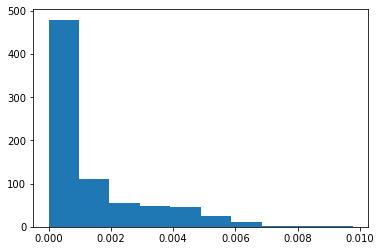

In [133]:
plt.hist(rf_classifier.feature_importances_, bins = 10, cumulative = False);

In [107]:
y = x.reshape(28,28)

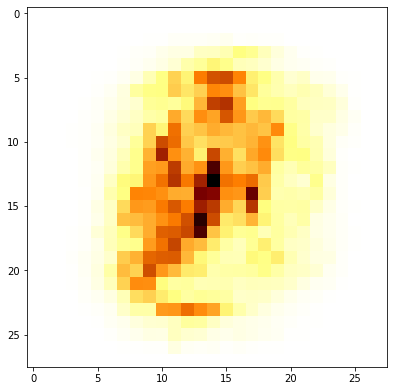

In [119]:
# set up the figure
fig = plt.figure(figsize=(5, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels

ax = fig.add_subplot()
ax.imshow(y, cmap=plt.cm.afmhot_r, interpolation='nearest');

In [123]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.0001)

In [128]:
select.fit(X_train, y_train)
select.fit(X_test, y_test)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold=0.0001)

In [129]:
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 250, 1000], "max_features": [7, 14, 21, 28]}
grid = GridSearchCV(rf_classifier, param_grid = param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_l1, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set accuracy: {:.3f}".format(grid.score(X_test_l1, y_test)))

Grid-Search with accuracy
Best parameters: {'max_features': 21, 'n_estimators': 1000}
Best cross-validation score (accuracy)): 0.963
Test set accuracy: 0.966


In [137]:
pd.DataFrame(grid.cv_results_).drop(columns={"params"})

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.026636,0.327153,0.309742,0.007390,7,100,0.956190,0.957460,0.958730,0.962063,0.958571,0.958603,0.001955,12
1,24.814994,0.966638,0.900492,0.044952,7,250,0.959365,0.959048,0.961587,0.963175,0.961270,0.960889,0.001521,11
2,112.452010,1.824324,8.568343,2.901027,7,1000,0.958889,0.962063,0.961270,0.964286,0.963333,0.961968,0.001855,7
3,19.476637,0.735403,0.384318,0.056976,14,100,0.961111,0.960000,0.959683,0.963333,0.960952,0.961016,0.001280,10
4,50.110650,0.646740,0.926384,0.144860,14,250,0.961111,0.962222,0.963810,0.963810,0.963333,0.962857,0.001048,4
5,189.631536,0.368455,6.710430,1.017890,14,1000,0.961270,0.962381,0.964921,0.963810,0.963492,0.963175,0.001250,2
6,26.504172,0.294814,0.326992,0.011156,21,100,0.958254,0.961111,0.963175,0.960794,0.963016,0.961270,0.001790,9
7,69.221472,1.800122,0.872541,0.101804,21,250,0.959206,0.963492,0.962222,0.962063,0.965714,0.962540,0.002118,5
8,246.807366,4.002196,3.491200,0.511830,21,1000,0.959683,0.963810,0.964921,0.963175,0.965397,0.963397,0.002017,1
9,34.806382,0.499628,0.324905,0.018074,28,100,0.957143,0.961587,0.961746,0.961746,0.964127,0.961270,0.002269,8


In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train_l1, y_train)
print("Accuracy on training set: {:.2f}".format(gbrt.score(X_train_l1, y_train)))
print("Accuracy on test set: {:.2f}".format(gbrt.score(X_test_l1, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.94


In [154]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0], "max_depth": [1, 2, 3, 4, 5]}
grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid = param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_l1, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set accuracy: {:.3f}".format(grid.score(X_test_l1, y_test)))

Grid-Search with accuracy
Best parameters: {'learning_rate': 0.3, 'max_depth': 5}
Best cross-validation score (accuracy)): 0.967
Test set accuracy: 0.973


In [292]:
# Train model on full dataset
X_l1 = select.transform(X)

In [295]:
hgbc = HistGradientBoostingClassifier(learning_rate = 0.3)

In [298]:
hgbc.fit(X_l1, y)

HistGradientBoostingClassifier(learning_rate=0.3)

In [ ]:
hgbc.fit(X_l1)

In [301]:
prediction = hgbc.predict(X_l1)
accuracy = np.mean(prediction == y)
print("Overall prediction accuracy: {:.3f}".format(accuracy))

Overall prediction accuracy: 0.960


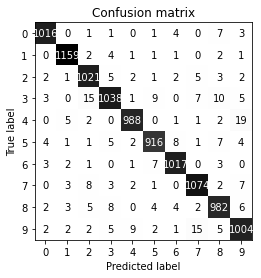

In [157]:
from sklearn.metrics import confusion_matrix
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, grid.predict(X_test_l1)), xlabel='Predicted label',
    ylabel='True label', xticklabels=[0,1,2,3,4,5,6,7,8,9],
    yticklabels=[0,1,2,3,4,5,6,7,8,9], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [ ]:
# Key confusions 4 & 9, 9 & 7, 3 & 8
# Can I plot confused images next to each other with probablities
# Subtract arrays from one another True minus Predicted e.g. 4 - 9 = -5

In [158]:
y_test[:10]

array([8, 5, 2, 4, 5, 0, 6, 6, 7, 9], dtype=int64)

In [164]:
prediction = grid.predict(X_test_l1)
prediction[:10] == 5
y_test[:10] == 5

array([False,  True, False, False,  True, False, False, False, False,
       False])

In [168]:
a = y_test == 4
b = prediction == 9

In [174]:
c = a*b

In [176]:
d = X_test[c]

In [180]:
e = d[~np.all(d == 0, axis=1)]

In [181]:
e.shape

(19, 784)

In [183]:
f = e.reshape(19,28,28)

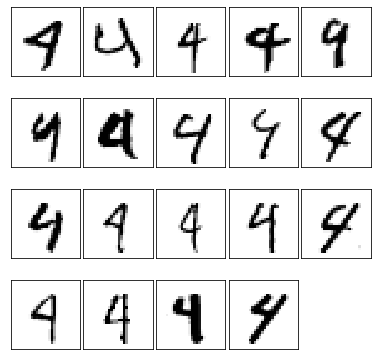

In [185]:
# set up the figure
fig = plt.figure(figsize=(5, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(19):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(f[i], cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
#     ax.text(0, 7, str(y[i]))

In [265]:
def confused_numbers(true_num, pred_num, y_test, prediction, X_test):
    a = y_test == true_num
    b = prediction == pred_num
    c = a*b
    d = X_test[c]
    e = d[~np.all(d == 0, axis=1)]
    g = e.shape[0]
    f = e.reshape(g,28,28)
    fig = plt.figure(figsize=(5, 5), frameon=True)  # figure size in inches
#     plt.title(f"Confused Digits: True: {true_num} Predicted: {pred_num}")
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    
    # plot the digits: each image is 28x28 pixels
    for i in range(g):
        ax = fig.add_subplot(4, g//3, i + 1, xticks=[], yticks=[])
        ax.imshow(f[i], cmap=plt.cm.Greys, interpolation='nearest')
    
    print(f"Confused Digits: True: {true_num} Predicted: {pred_num} Count: {g}")
    
    return c

Confused Digits: True: 9 Predicted: 7 Count: 15


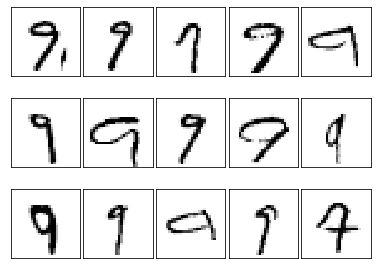

In [266]:
c = confused_numbers(9,7,y_test, prediction, X_test)

In [291]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
h = grid.predict_proba(X_test_l1)[c]
print(h)

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.91 0.00 0.09]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.55 0.00 0.44]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.99 0.00 0.01]
 [0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.98 0.00 0.01]
 [0.00 0.00 0.01 0.00 0.04 0.16 0.00 0.54 0.00 0.25]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
 [0.00 0.00 0.11 0.01 0.00 0.06 0.00 0.44 0.00 0.38]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.98 0.00 0.02]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
 [0.00 0.15 0.00 0.00 0.00 0.00 0.00 0.76 0.00 0.09]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.97 0.00 0.03]
 [0.00 0.11 0.00 0.00 0.00 0.00 0.00 0.84 0.00 0.05]
 [0.00 0.00 0.06 0.00 0.28 0.10 0.00 0.55 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.93 0.00 0.07]
 [0.00 0.00 0.00 0.00 0.07 0.00 0.00 0.72 0.00 0.22]]


In [272]:
print("Test set accuracy: {:.3f}".format(h[0]))

TypeError: unsupported format string passed to numpy.ndarray.__format__